# Основы анализа данных в Python

*Тамбовцева Алла, НИУ ВШЭ*

## Семинар 3. Визуализация данных с `matplotlib`

## Часть 1: предварительная обработка датафрейма

### Информация о данных

В рамках этого семинара используем данные с результатами опроса преподавателей двух каталонских универсистетов (Открытый университет Каталонии и университет Помпеу Фабра), посвященного использованию Википедии в методических и академических целях.

* Codebook для набора данных: [ссылка](https://github.com/allatambov/PyDataAnalysis/blob/main/wiki_codebook.pdf).
* Оригинальное описание на платформе data.world: [ссылка](https://data.world/uci/wiki4he).

### Загрузка данных 

Импортируем библиотеку `pandas` с сокращенным названием `pd`:

In [1]:
import pandas as pd

Загрузим данные из файла `"wiki.csv"` и сохраним их в датафрейм `wiki`, сообщив Python, что в качестве разделителя столбцов используется точка с запятой, а не запятая:

In [2]:
wiki = pd.read_csv("wiki.csv", sep = ";") 

Если мы не добавим аргумент `sep` с разделителем, все данные склеятся в один столбец, так как по умолчанию функция `read_csv()` подразумевает разделение по запятой (ведь название формата CSV – это сокращение от *comma separated values*).

**Примечание для Jupyter Notebook.** Удобно, если файл с данными при работе лежит в той же папке, что и текущий ipynb-файл, в котором мы запускаем код, так не придется полностью прописывать к нему путь, достаточно одного названия с расширением.

**Примечание для Google Colab.** Загрузить файл с данными в облачное хранилище можно через кнопку *Files* (значок папки слева от рабочей области с ячейками), при нажатии на которую появляется возможность выбрать файл с компьютера (значок стрелки). После добавления файла его можно выбрать, кликнуть на три точки справа от названия, скопировать путь через *Copy path* и вставить его в функцию `read_csv()`. Например:

    wiki = pd.read_csv("/content/wiki.csv", sep = ";") 

Теперь запросим техническую информацию по датафрейму:

In [8]:
wiki.info() # для компактности конспекта ячейка не запущена

Итак, датафрейм довольно большой: 913 наблюдений (строк) и 53 переменных (столбцов). Какие-то столбцы содержат целые числа (`int` от `integer`), какие-то – текст (`object`, он же `string` за рамками `pandas`). Но, как это бывает, не всегда типы данных при загрузке совпадают с нашими ожиданиями, чуть позже разберемся, что в этом датафрейме надо поправить.

### Выбор столбцов и строк

Датафрейм большой, давайте отберем из него только те столбцы, которые нам понадобятся. Выбирать столбцы удобнее всего по названию, его мы указываем в квадратных скобках (да и вообще любой выбор далее будет осуществляться с помощью квадратных скобок). Выберем столбец со значениями возраста сотрудников университетов:

In [3]:
wiki["AGE"] 

0      40
1      42
2      37
3      40
4      51
       ..
908    43
909    53
910    39
911    40
912    41
Name: AGE, Length: 913, dtype: int64

Теперь выберем несколько столбцов – перечислим их названия в виде списка (одни квадратные скобки – для выбора, вторые – для создания списка) и сохраним их в датафрейм `small`:

In [4]:
small = wiki[["AGE", "GENDER", "YEARSEXP", "UNIVERSITY", 
              "UOC_POSITION", "Qu3"]]  

Если названия столбцов переписывать, можно опечататься, удобнее будет их скопировать из перечня названий, который хранится в атрибуте `.columns`:

In [5]:
wiki.columns

Index(['AGE', 'GENDER', 'DOMAIN', 'PhD', 'YEARSEXP', 'UNIVERSITY',
       'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI', 'PU1',
       'PU2', 'PU3', 'PEU1', 'PEU2', 'PEU3', 'ENJ1', 'ENJ2', 'Qu1', 'Qu2',
       'Qu3', 'Qu4', 'Qu5', 'Vis1', 'Vis2', 'Vis3', 'Im1', 'Im2', 'Im3', 'SA1',
       'SA2', 'SA3', 'Use1', 'Use2', 'Use3', 'Use4', 'Use5', 'Pf1', 'Pf2',
       'Pf3', 'JR1', 'JR2', 'BI1', 'BI2', 'Inc1', 'Inc2', 'Inc3', 'Inc4',
       'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5'],
      dtype='object')

*Пояснение.* Атрибут – некоторая фиксированная характеристика объекта (число строк или столбцов в датафрейме, названия строк или столбцов, тип данных), метод – функция, которая выполняет некоторую операцию над объектом. И атрибуты, и методы вызываются через точку, но в конце метода всегда есть круглые скобки (например, `.info()`), они означают, что мы хотим применить метод, а не просто вызвать и посмотреть на него.

Теперь займемся строками. Давайте оставим в датафрейме `small` только строки, соответствующие сотрудникам Открытого университета Каталонии (закодированы значением 1 в столбце `UNIVERSITY`):

In [6]:
small = small[small["UNIVERSITY"] == 1]

Как устроен код выше? В квадратных скобках, как обычно, указывается некоторый критерий отбора, здесь он представлен в виде условия (помним, что оператор `==` используется для проверки равенства, а оператор `=` для присваивания, второй нам здесь не подойдет). Выражение в квадратных скобках, само по себе, проверяет условие для каждой строки в `small` и возвращает набор из логических значений `True` (если условие выполнено) и `False` (если условие не выполнено):

In [7]:
small["UNIVERSITY"] == 1

0      True
1      True
2      True
3      True
4      True
       ... 
795    True
796    True
797    True
798    True
799    True
Name: UNIVERSITY, Length: 800, dtype: bool

Соответственно, строка кода в предыдущей ячейке отбирает те строки из `small`, где выражение в квадратных скобках вернуло `True`. 

Теперь отберем только сотрудников, имеющих должность *lecturer* или *assistant* (метки  "3" или "4") и сохраним их в датафрейм `tiny`. Для этого нам понадобится оператор `|`, соответствующий объединению условий через ИЛИ (хотя бы одно из условий верно):

In [8]:
tiny = small[(small["UOC_POSITION"] == '3') | 
             (small["UOC_POSITION"] == '4')]

Важно: не потеряйте круглые скобки вокруг каждого из условий. Оператор `|` в примере самый сильный, поэтому без скобок Python начнет «раскручивать» условие с него. И тогда он попробует через ИЛИ объединить значение `'3'` и столбец `small["UOC_POSITION"]`, это у него, естественно, не получится, что приведет к ошибке `TypeError`.    

И напоследок удалим из `tiny` столбец с названием университета (у нас сотрудники только одного, у всех одно и то же значение) и столбец с должностями сотрудников. Для этого воспользуемся методом `.drop()`.

In [9]:
tiny = tiny.drop(columns = ["UNIVERSITY", "UOC_POSITION"])

Метод `.drop()` по умолчанию работает со строками, поэтому в скобках мы указываем, что удалять нужно все-таки столбцы, а затем перечисляем их названия в виде списка. Этот метод работает осторожно, он не вносит изменения в датафрейм, он возвращает его измененную копию. Мы сохраняем эту копию с тем же названием `tiny`.

## Часть 2: описание данных

Посмотрим теперь на более содержательное описание данных. Запросим описательные статистики через метод `.describe()`:

In [10]:
tiny.describe() 

,AGE,GENDER
count,68.000000,68.000000
mean,40.382353,0.544118
std,6.376331,0.501753
min,29.000000,0.000000
25%,35.000000,0.000000
50%,40.000000,1.000000
75%,45.250000,1.000000
max,56.000000,1.000000


Метод `.describe()` по умолчанию выводит описательные статистики только для числовых столбцов (типы `integer` и `float`). Для столбца `AGE` все полученные значения имеют понятный смысл: 

* `count`: число заполненных ячеек 68;
* `mean` : средний возраст сотрудников примерно 40 лет;
* `std` : стандартное отклонение возраста примерно 6 лет;
* `50%`: возраст половины сотрудников также не превышает 40 лет (медиана); 
* `25%`: 25% сотрудников не старше 35 лет (нижний квартиль);
* `75%`: 75% сотрудников не старше 45 лет (верхний квартиль);
* `min` и `max`: самому молодому сотруднику 29 лет, самому пожилому – 56.

Если полученные значения кажутся немного заниженными, вспомните, что мы ранее отфильтровали сотрудников по должности, тут только преподаватели и ассистенты, а более возрастная категория – это все-таки профессора. 

Для столбца `GENDER` не все статистики стоит внимательно изучать, все-таки пол – показатель качественный, но на среднее стоит посмотреть – это просто доля «единиц» в нашей выборке, то есть доля мужчин среди опрошенных (примерно 54%).

Если мы хотим получить описание текстовых столбцов (если все нормально с типами данных, это показатели в качественной или порядковой шкале), в `.describe()` можно добавить опцию `include` и указать соответствующий тип:

In [11]:
tiny.describe(include = "object")

,YEARSEXP,Qu3
count,68,68
unique,20,6
top,12,3
freq,8,32


Почему число лет опыта работы `YEARSEXP` оказалось текстовым, мы выясним чуть позже, а пока посмотрим на `Qu3`. В строке `unique` сохранено число уникальных значений, здесь из 6 (согласие/несогласие с утверждением по шкале Лайкерта и значение для кодирования пропусков). В строке `top` хранится мода, самое частое значение, здесь это 3 (*Neither disagree nor agree*, что ожидаемо). В строке `freq` находится частота, соответствующая моде, в данном случае ответ 3 выбрали 32 человека. 

Теперь посмотрим, что не так с `YEARSEXP`. Выведем уникальные значения:

In [12]:
tiny["YEARSEXP"].unique() 

array(['13', '8', '17', '11', '12', '25', '10', '9', '5', '?', '18', '15',
       '19', '4', '7', '20', '3', '16', '6', '2'], dtype=object)

Ага! Проблема в знаке вопроса – так в этих данных были закодированы пропущенные ответы. Выкинем строки с пропущенными ответами – выберем только те строки, где значение в столбце `YEARSEXP` не `?`:

In [13]:
tiny = tiny[tiny["YEARSEXP"] != "?"] 

Проверим:

In [14]:
tiny["YEARSEXP"].unique() 

array(['13', '8', '17', '11', '12', '25', '10', '9', '5', '18', '15',
       '19', '4', '7', '20', '3', '16', '6', '2'], dtype=object)

Лишнее выкинулось, но небольшая проблема осталась. Значения по-прежнему текстовые! Первое, что хочется сделать – пройтись в цикле по всем элементам массива выше и преобразовать каждый в число. Но, к счастью, есть более быстрый и компактный способ – воспользоваться методом `.astype()`, он умеет изменять тип сразу всех элементов массива или столбца:

In [15]:
tiny["YEARSEXP"] = tiny["YEARSEXP"].astype(int) # переделываем в integer

Напоследок давайте вспомним о том, как выводить описательные статистики по группам, и наконец перейдем к визуализации. Сгруппируем всех респондентов в `tiny` по полу и выведем среднее значение для числовых столбцов. Для этого воспользуемся методом `.groupby()` для группировки и методом `.agg()` для агрегирования (внутри указываем, какую функцию для каждой группы применить – здесь функцию для вычисления среднего):

In [16]:
tiny.groupby("GENDER").agg("mean")

,AGE,YEARSEXP
GENDER,,
0,41.689655,11.310345
1,39.222222,10.333333


Итак, видно, что средние значения возраста сотрудников мужского и женского пола отличаются несильно. То же верно и для числа лет опыта работы. Посмотрим на медианные значения по группам:

In [17]:
tiny.groupby("GENDER").agg("median")

,AGE,YEARSEXP
GENDER,,
0,41,10
1,40,11


Примерно та же история. Чисто технически, метод `.agg()` можно было опустить и написать код проще:

In [18]:
tiny.groupby("GENDER").median()

,AGE,YEARSEXP
GENDER,,
0,41,10
1,40,11


Но этот метод все-таки более универсальный, он позволяет выводить сразу несколько характеристик для каждой группы. В таком случае соответствующие функции нужно записывать в виде списка:

In [19]:
tiny.groupby("GENDER").agg(["mean", "std"]) 

AGE             YEARSEXP          
             mean       std       mean       std
GENDER                                          
0       41.689655  6.724706  11.310345  4.575583
1       39.222222  5.836394  10.333333  5.466783

Итак, мы вывели среднее и стандартное отклонение – распространенные характеристики выборок.

## Часть 3: визуализация

Для создания разных типов графиков нам понадобится библиотека `matplotlib`, а точнее, основной ее модуль, под названием `pyplot`. Его часто импортируют с сокращенным названием `plt`, что мы и сделаем:

In [20]:
from matplotlib import pyplot as plt

### Гистограмма

Начнем знакомство с визуализацией с гистограммы – довольно простого в плане оформления графика. Почему простого? 

Во-первых, потому что для гистограммы достаточно выбрать один цвет (один показатель, не разные категории, не путать со столбиковой диаграммой). Во-вторых, потому что не нужно думать о том, как упорядочить столбцы на графике (они сами упорядочиваются естественным образом в силу логики построения). В-третьих, потому что не нужно переживать о том, как уместить названия на осях (по горизонтальной и вертикальной осям идут обычные числа, а они занимают мало места).

Для начала построим самую простую гистограмму для визуализации распределения возраста. Для этого из модуля `plt` вызовем функцию `.hist()`:

(array([ 6.,  6.,  9.,  8., 13.,  7.,  8.,  4.,  2.,  2.]),
 array([29. , 31.7, 34.4, 37.1, 39.8, 42.5, 45.2, 47.9, 50.6, 53.3, 56. ]),
 <a list of 10 Patch objects>)

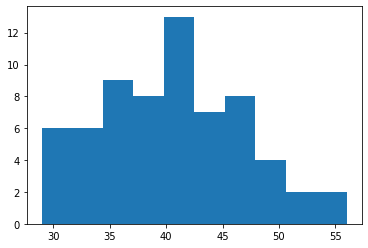

In [21]:
plt.hist(tiny["AGE"])

Если мы планируем оставлять этот график в ipynb-файле, в конце предыдущей строчки можно добавить точку с запятой, она сообщит Python, что нужен только сам график, без массивов, которые показывают, как функция разбила данные на группы для построения гистограммы:

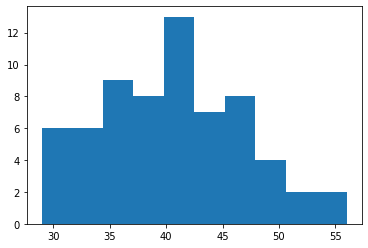

In [22]:
plt.hist(tiny["AGE"]);

Гистограмма сейчас совсем несимпатичная. Изменим цвет заливки (`color`) и добавим цвет границ столбцов (`edgecolor`):

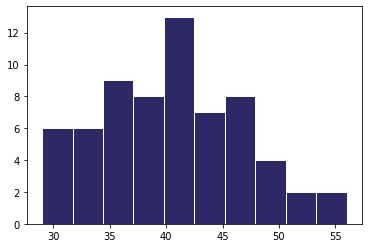

In [23]:
plt.hist(tiny["AGE"], color = "#2d2966", edgecolor = "white");

Цвета (как в примере выше) можно добавлять в шестнадцатеричном формате, то есть можно выбрать цвет, например, в [палитре](https://g.co/kgs/yqtg6m) Google и указать его в коде. Подробнее о цветах в `matplotlib` можно почитать в соответствующей [документации](https://matplotlib.org/stable/tutorials/colors/colors.html). 

По умолчанию Python сам выбирает количество столбцов для гистограммы, но при желании это число можно изменить, например, если гистограмма получилась неудачной (с «дырками» или большим числом узких столбцов), добавив аргумент `bins`:

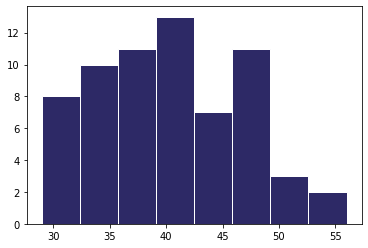

In [24]:
# 8 столбцов

plt.hist(tiny["AGE"], color = "#2d2966", edgecolor = "white", bins = 8);

В аргумент `bins` можно записывать не только числа, в нем можно указать алгоритм, который используется для выбора числа столбцов, про доступные опции можно почитать [здесь](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges).

Теперь давайте приведем гистограмму в порядок. Как минимум, добавим подписи к осям и заголовок графика (если график в дальнейшим будет выгружен в файл и добавлен в текстовый документ, заголовок часто опускают, он будет в самом текстовом документе с соответствующим шрифтом, номером рисунка и проч). 

Если мы хотим получить красивые графики с возможностью регулировать их оформление с помощью `matplotlib`, нам придется более глубоко разобраться с логикой их построения. График `matplotlib` состоит из двух частей: 

* «рамка» для картинки (обычно сохраняется как `fig`); 
* поле с осями, внутри которого строится график (обычно сохраняется как `ax`).

Так, мы можем воспользоваться функцией `subplots()` и сообщить Python, что мы хотим получить картинку размера 16 на 9 дюймов:

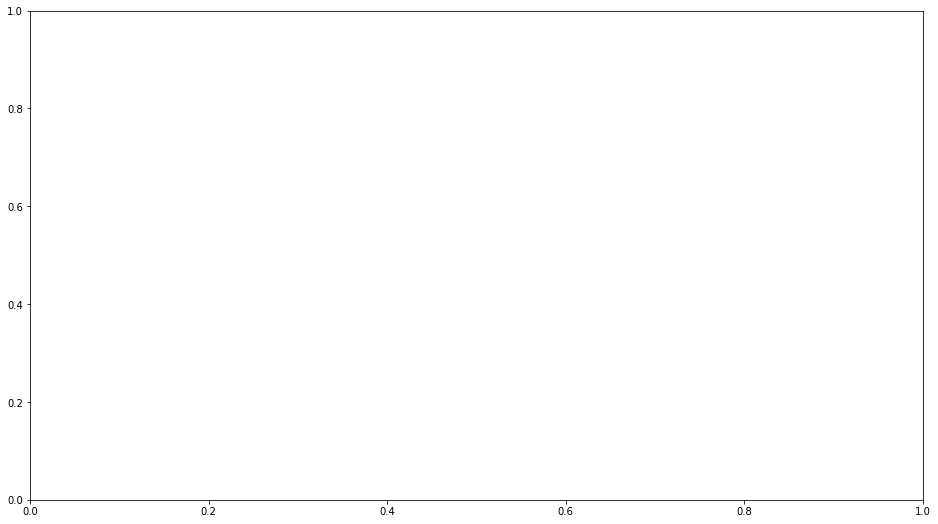

In [25]:
fig, ax = plt.subplots(figsize =(16, 9)) 

Неформально, создавая `fig` мы резервируем место под картинку соответствующего размера, а затем проводим различные манипуляции с `ax`, чтобы внутри этого поля для картинки построить график, настроить подписи, оси и прочее. Соответственно, к `ax` мы будем применять различные методы, а по завершении работы сможем выгрузить объект `fig` в файл PNG или JPEG.

Вообще функция `subplots()`, как следует из ее названия, может использоваться для построения сразу нескольких графиков, но у нас пока внутри `fig` будет один. На список доступных опций, помимо размера, можно посмотреть в соответствующей [документации](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure).

Построим гистограмму и настроим ее:

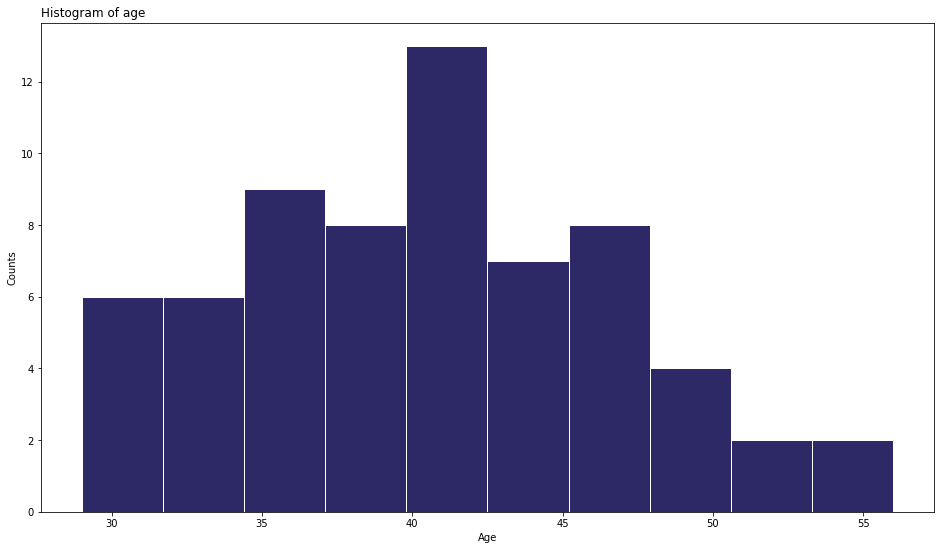

In [26]:
fig, ax = plt.subplots(figsize =(16, 9)) 

# строим гистограмму, обратите внимание, перед hist 
# стоит ax, не plt

ax.hist(tiny["AGE"], color = "#2d2966", edgecolor = "white")

# добавляем заголовок графика и выравниваем по левому краю
# добавляем подписи по осям x и y

ax.set_title('Histogram of age', loc ='left')
ax.set_xlabel("Age")
ax.set_ylabel("Counts")

# выгружаем в файл, он появится в рабочей папке
# рядом с текущим ipynb-файлом 

fig.savefig("my_hist.png")

Проблема: подписи на графике очень мелкие. Можно решить эту проблему глобально, один раз и для всех графиков в рамках данного ipynb-файла, обновив параметры модуля `plt`. На список доступных параметров можно посмотреть [здесь](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams).

Мы же обновим размер базового шрифта:

In [27]:
plt.rcParams.update({'font.size': 16})

Теперь, если мы перезапустим код выше, все подписи на графике, включая числа, увеличатся (и это будет работать для всех последующих графиков):

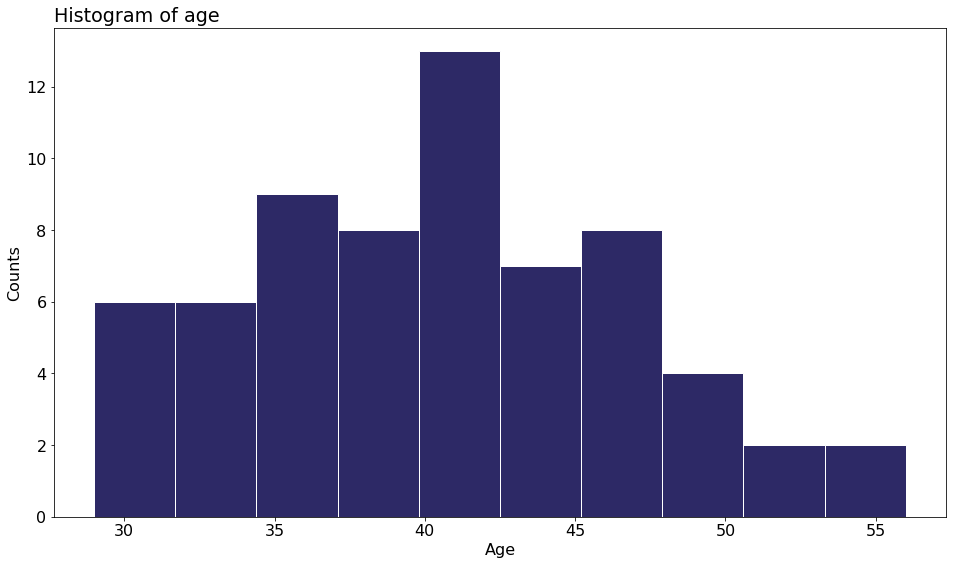

In [28]:
fig, ax = plt.subplots(figsize =(16, 9)) 

ax.hist(tiny["AGE"], color = "#2d2966", edgecolor = "white")
ax.set_title('Histogram of age', loc ='left')
ax.set_xlabel("Age")
ax.set_ylabel("Counts")

fig.savefig("my_hist.png")

Небольшое дополнение для любителей эстетики (не обсуждали на занятии): как добавить координатную сетку, так называемый *grid*:

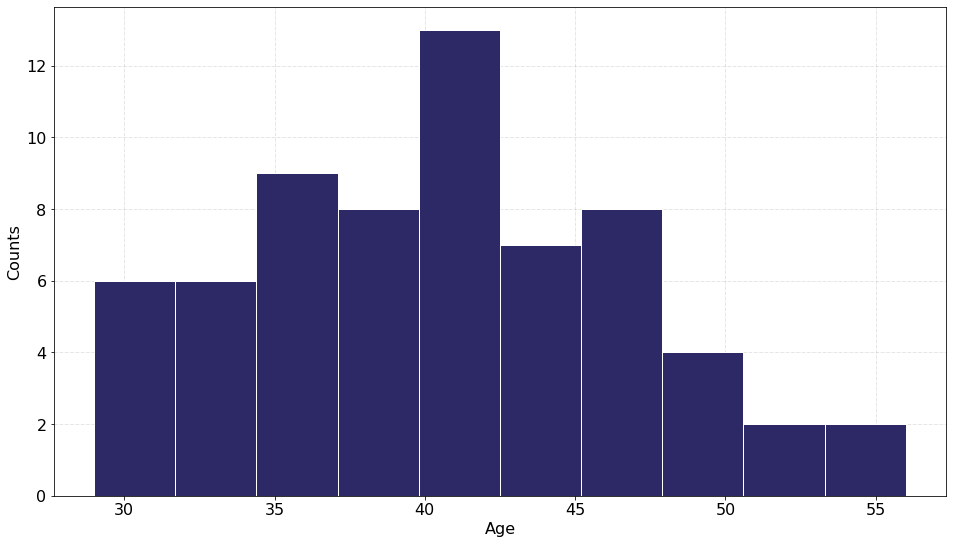

In [29]:
fig, ax = plt.subplots(figsize =(16, 9)) 

ax.hist(tiny["AGE"], color = "#2d2966", edgecolor = "white")
ax.set_xlabel("Age")
ax.set_ylabel("Counts")

# отправляет сетку на задний план,
# чтобы не перечеркивала график

ax.set_axisbelow(True)

# цвет сетки, тип линии, ширина, прозрачность

ax.grid(color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

Документацию по функции `grid()` можно посмотреть [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html), типы доступных линий – [здесь](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Итак, будем считать, что красивую гистограмму построили (надо остановиться). Проинтерпретируем полученный график. Распределение возраста сотрудников университета в должности преподавателя или ассистента немного скошено вправо, значения выше 50 лет являются не совсем типичными. Возраст большинства преподавателей и ассистентов находится на интервале от 40 до 42 лет.

## Диаграмма рассеивания

Построим диаграмму рассеивания, которая покажет нам связь между двумя количественными показателями — возрастом и числом лет опыта работы. Для построения такой диаграммы используется простая функция `plot()`, но тут есть подвох:

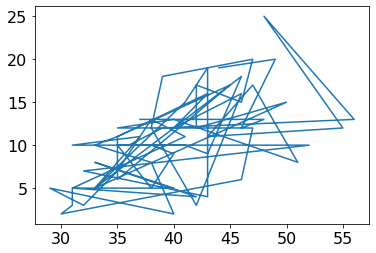

In [30]:
plt.plot(tiny["AGE"], tiny["YEARSEXP"]);

Подвох заключается в том, что по умолчанию функция `plot()` используется для построения графиков математических функций, то есть графиков, где точки соединены линией. Нам нужно добавить аргумент, который будет соответствовать только точкам:

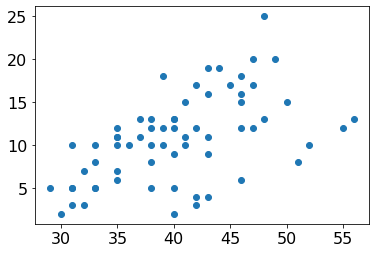

In [31]:
plt.plot(tiny["AGE"], tiny["YEARSEXP"], 'o')

Здесь `'o'` – это один из возможных маркеров для точек, перечень маркеров с обозначениями можно посмотреть [здесь](https://matplotlib.org/stable/api/markers_api.html).

Давайте построим более красивый график, выполним все те же действия, что и с гистограммой (скорректируем размер, цвет, добавим подписи и сетку):

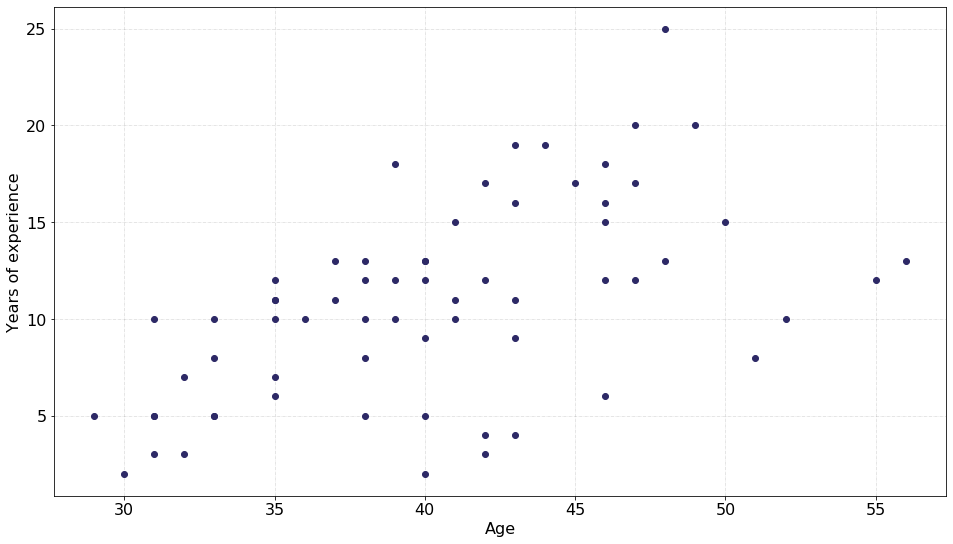

In [32]:
fig, ax = plt.subplots(figsize =(16, 9))

plt.plot(tiny["AGE"], tiny["YEARSEXP"], 'o', color = "#2d2966")
ax.set_xlabel("Age")
ax.set_ylabel("Years of experience")

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

Итак, судя по графику, связь между показателями есть, и она положительна. У более старших сотрудников число лет опыта работы больше (что вполне логично).

## Матрица диаграмм рассеивания

Построим более специфический график — матрицу диаграмм рассеивания. На самом деле, это просто набор диаграмм рассеивания сразу для нескольких показателей, полезный в случае, если мы хотим посмотреть на связь «всего со всем». Давайте сначала построим матрицу диаграмм рассеивания, а потом разберемся, что есть что.

Для этого нам понадобится функция `scatter_matrix()` из модуля для графики `plotting` внутри библиотеки `pandas`. Вызов функции будет выглядеть довольно длинно:

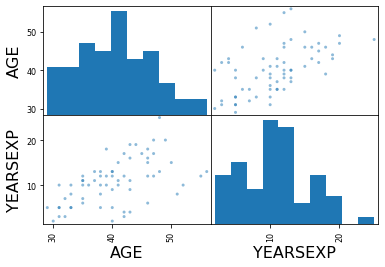

In [33]:
# извлекаем столбцы AGE и YEARSEXP

pd.plotting.scatter_matrix(tiny[["AGE", "YEARSEXP"]]);

Что представляет собой этот график? Матрицу (сетку или таблицу), которая содержит симметричные диаграммы рассеивания (`AGE` на `YEARSEXP` в нижнем углу и `YEARSEXP` на `AGE` в верхнем углу) и гистограммы на главной диагонали. Логика простая: смотрим на названия переменных по строкам и столбцам таблицы и на пересечении находим соответствующую диаграмму рассеивания. Строить диаграмму рассеивания для связи переменной самой с собой бессмысленно, поэтому вместо таких диаграмм добавлены гистограммы. 

График довольно полезный, особенно, если показателей, между которыми мы хотим визуализировать связь, много. Разумно много, не забывайте, что визуализация должна быть читаемой и понятной. Например, если у нас есть пять показателей и мы хотим для каждой пары показателей построить диаграмму рассеивания, нам придется построить целых $\frac{5 \times 4}{2} = 10$ графиков (считаем, что диаграмма рассеивания $X$ на $Y$ и $Y$ на $X$ –  это одно и то же, просто с перевернутыми осями). А так мы можем написать одну строчку кода для матрицы диаграмм рассеивания и бонусом получить еще и гистограммы.

Еще одно удобство состоит в том, что необязательно самим отбирать столбцы для построения матрицы через `scatter_matrix()`. Эта функция умеет сама выбирать числовые столбцы из датафрейма:

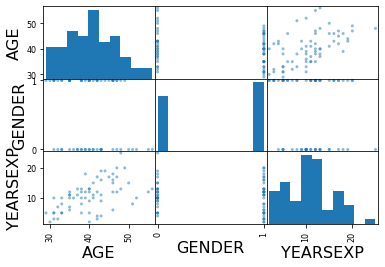

In [34]:
# здесь не самая удачная картинка, 
# пол в датафрейме закодирован числами 0 и 1,
# поэтому мы видим такие «неприятные» диаграммы рассеивания
# и гистограмму из двух столбиков, что тоже не супер

pd.plotting.scatter_matrix(tiny);

Давайте сделаем график красивым. Названия аргументов будут аналогичны тем, что мы видели в примерах выше, только здесь уже не нужно использовать `fig` и `ax`, функция `scatter_matrix()` из библиотеки `pandas`, а не `matplotlib`, у нее своя логика работы.

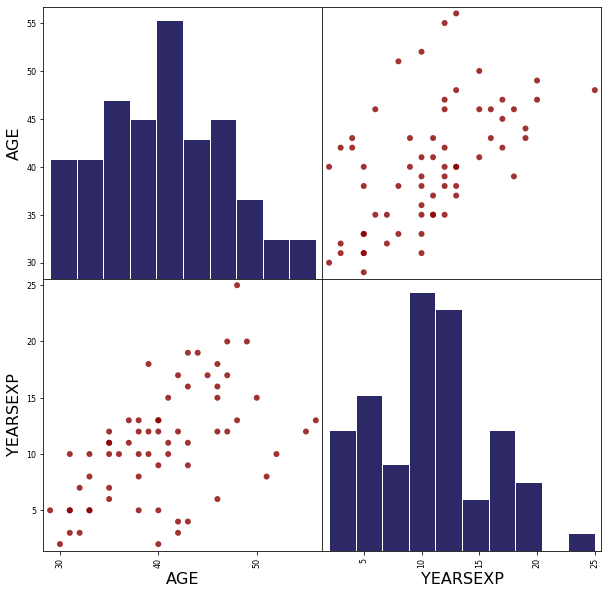

In [35]:
# figsize: размер матрицы в дюймах, логично делать ее квадратной
# color и alpha: цвет и прозрачность точек
# marker: тип маркера для точек
# hist_kwds: от histogram keywords


pd.plotting.scatter_matrix(tiny[["AGE", "YEARSEXP"]], 
                           figsize = (10, 10),
                           color = "#8B0000", 
                           alpha = 0.8, 
                           marker = "o",
                           hist_kwds = {"color": "#2d2966", 
                                       "edgecolor" : "white"});

Перечень аргументов функции `scatter_matrix()` можно посмотреть [здесь](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html). Более продвинутые вопросы вроде изменения подписей под каждым графиком пока рассматривать не будем, это долгая история с осями и циклами.

## Столбиковая диаграмма

Столбиковая диаграмма – один из самых простых видов графиков, однако в Python его построение сопряжено с небольшой сложностью. Для создания столбиковой диаграммы Python должен точно знать, какие категории будут идти по горизонтальной оси (или вертикальной, если мы поворачиваем график), и чему будут равны высоты соответствующих столбиков. В отличие от случая с гистограммой, здесь сам он посчитать частоты не может. 

Поэтому таблицу с частотами нужно подготовить самостоятельно. Для этого можно воспользоваться методом `.value_counts()`. Выведем таблицу частот для столбца `Qu3`, степени согласия с утверждением *Articles in Wikipedia are comprehensive*:

In [36]:
tiny["Qu3"].value_counts()

3    30
2    16
4    14
5     2
1     2
?     1
Name: Qu3, dtype: int64

Итак, в таблице записаны категории и соответствующие им частоты (30 ответов 3, 16 ответов 2, и так далее), причем категории упорядочены от самой частой до самой редкой.

Полученный результат – это объект типа `pandas.Series`, то есть просто столбец с данными, где у каждого значения есть индекс (номер). Для тех, кто хорошо владеет Python: `pandas.Series` – это что-то среднее между массивом и словарем; от массива у него того, что все элементы одного типа, а от словаря – соответствие ключ-значение, то есть индекс-значение.

Сохраним полученную таблицу в переменную `tab` и извлечем из нее названия категорий и частоты:

In [37]:
tab = tiny["Qu3"].value_counts()
vals = tab.index  # категории
freqs = tab.values  # частоты

In [38]:
vals

Index(['3', '2', '4', '5', '1', '?'], dtype='object')

In [39]:
freqs

array([30, 16, 14,  2,  2,  1])

Сейчас у нас есть два массива (первое – не совсем массив, но суть та же), мы можем сообщить Python, какие значения располагать по горизонтальной и вертикальной осям. Для построения столбиковой диаграммы используется функция `bar()`:

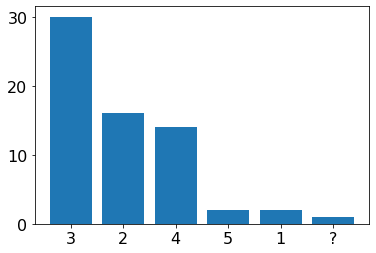

In [40]:
plt.bar(vals, freqs);

Столбики упорядочены вполне разумным образом, от самого популярного ответа до наименее популярного. Но график точно нужно красиво оформить! Действуем по аналогии с гистограммой, только помним, что, в отличие от гистограммы, цвета столбиков у такой диаграммы могут быть разными. 

Есть готовые палитры цветов для графиков, более того, палитры контрастных цветов, я взяла набор цветов [отсюда](https://colorpalettes.net/color-palette-4284/), [ресурс](https://colorpalettes.net/category/contrasting-color/) для дизайнеров, не для аналитиков, но палитры вдохновляющие (вдохновляйтесь, но не забывайте, что у дизайнеров немного другие цели, брать слишком яркие и неестественные «кислотные» цвета плохо, равно как и блеклые цвета, которые будут плохо смотреться на белом фоне).

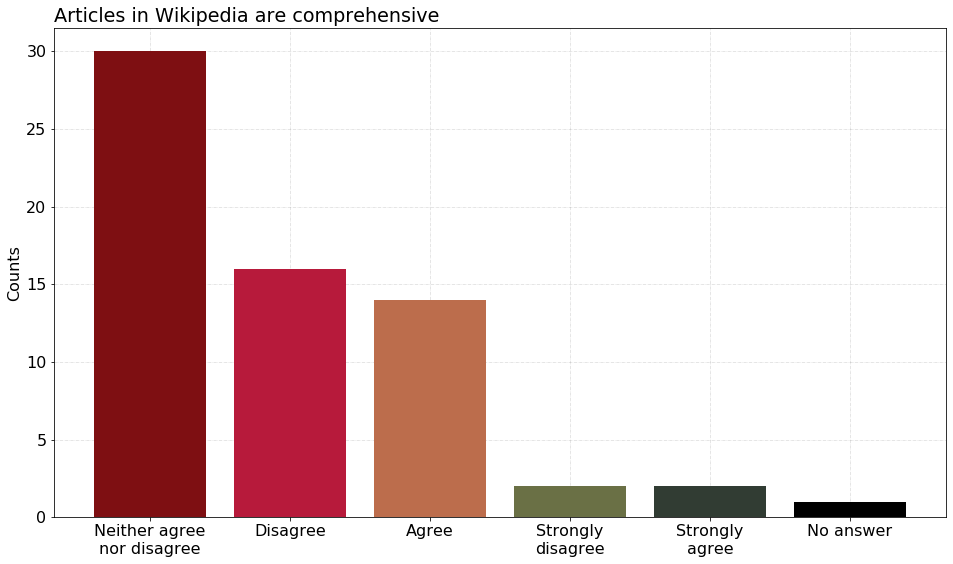

In [41]:
fig, ax = plt.subplots(figsize =(16, 9)) 

# tick_label: подписи для категорий-столбцов
# \n в подписях нужен для разбиения длинных строк,
# это символ для перехода на новую строку

ax.bar(vals, freqs, 
       color = ["#7e0f12", "#b71a3b", "#bc6d4c", 
                "#6a7045",  "#313c33", "black"],
      tick_label = ["Neither agree\nnor disagree", 
                    "Disagree", 
                    "Agree", 
                    "Strongly\ndisagree",
                    "Strongly\nagree", 
                    "No answer"])

# добавляем подписи

ax.set_title("Articles in Wikipedia are comprehensive", loc = 'left')
ax.set_ylabel("Counts")

# добавляем сетку

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

Этот же график можно было бы построить вертикально. Тот же код, только вместо функции `bar()` понадобится функция `barh()` (от *horizontal*): 

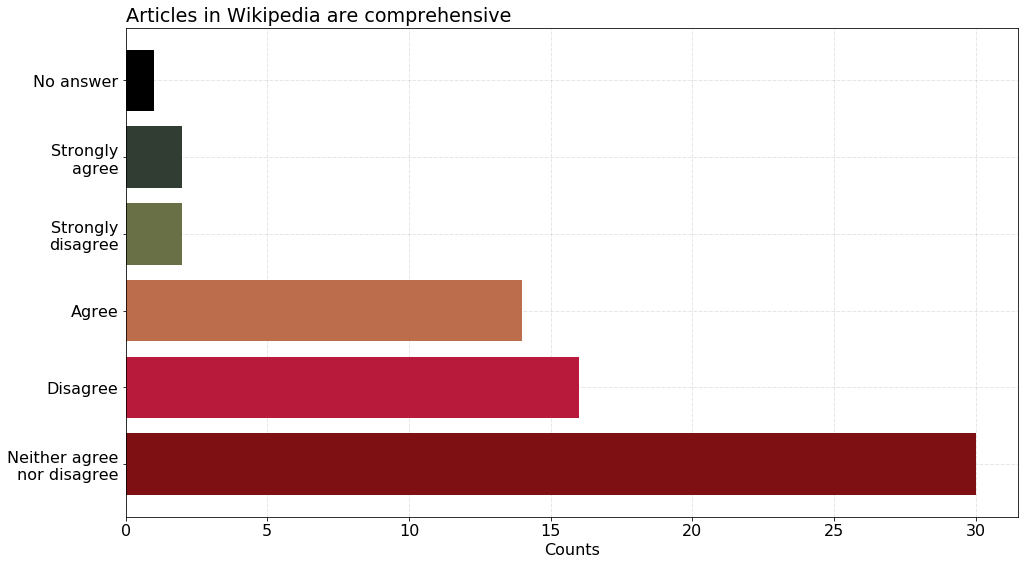

In [42]:
fig, ax = plt.subplots(figsize =(16, 9)) 

ax.barh(vals, freqs, 
       color = ["#7e0f12", "#b71a3b", "#bc6d4c", 
                "#6a7045",  "#313c33", "black"],
      tick_label = ["Neither agree\nnor disagree", 
                    "Disagree", 
                    "Agree", 
                    "Strongly\ndisagree",
                    "Strongly\nagree", 
                    "No answer"])
# и Counts по оси x

ax.set_title("Articles in Wikipedia are comprehensive", loc = 'left')
ax.set_xlabel("Counts")

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

Не самый лучший вариант, график будет более читаемым, если самый длинный прямоугольник будет сверху. При желании можно все категории упорядочить вручную и просто создать два списка, список с названиями категорий и список с частотами. Если значений немного, такой вариант приемлем.

Напоследок рассмотрим пример, который требует сортировки названий столбцов. Предположим, что мы хотим построить столбиковую диаграмму, где столбцы упорядочены по ответам, от *Strongly disagree* (значение 1) до *Strongly agree* (значение 5), при этом категорию *No answer* мы исключаем. Как в таком случае поступить? Вспомним, как выглядит `tab`:

In [43]:
tab

3    30
2    16
4    14
5     2
1     2
?     1
Name: Qu3, dtype: int64

Отсортируем строки в `tab` по индексу, метод `.sort_index()` нам поможет:

In [44]:
tab_new = tab.sort_index()
tab_new

1     2
2    16
3    30
4    14
5     2
?     1
Name: Qu3, dtype: int64

Отлично! Уберем последнюю строку с вопросительным знаком:

In [45]:
# все строки, с 0 до -1, то есть последняя исключена

tab_new = tab_new[:-1]
tab_new

1     2
2    16
3    30
4    14
5     2
Name: Qu3, dtype: int64

Забираем, как и раньше, названия категорий и частоты:

In [46]:
vals_new = tab_new.index
freqs_new = tab_new.values

И подставляем их в код для графика:

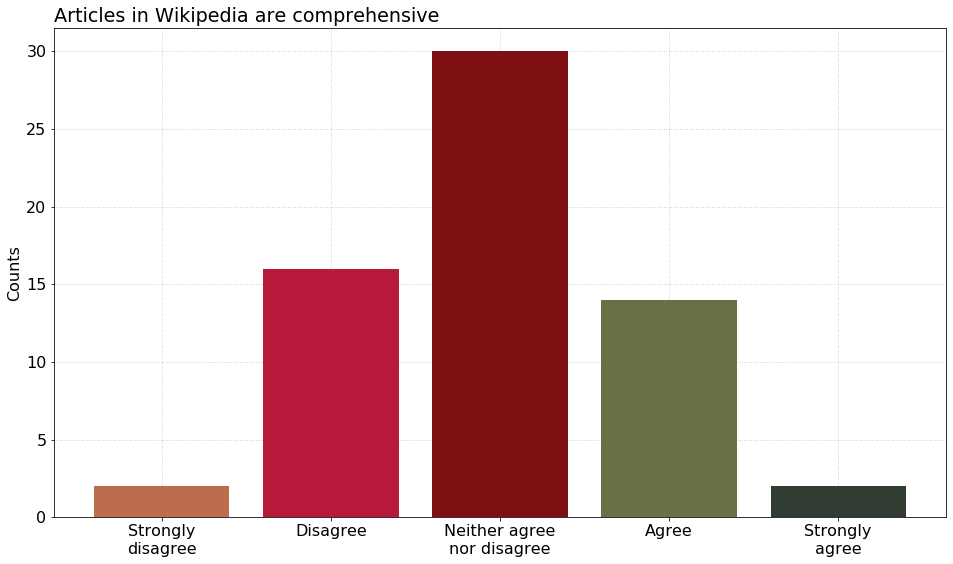

In [47]:
fig, ax = plt.subplots(figsize =(16, 9)) 

ax.bar(vals_new, freqs_new, 
       color = ["#bc6d4c", "#b71a3b", "#7e0f12", 
                "#6a7045",  "#313c33"],
      tick_label = ["Strongly\ndisagree", 
                    "Disagree", 
                    "Neither agree\nnor disagree",
                    "Agree",
                    "Strongly\nagree"])

ax.set_title("Articles in Wikipedia are comprehensive", loc = 'left')
ax.set_ylabel("Counts")

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

На этом закончим знакомство с базовыми графиками в `matplotlib`, о более сложных случаях построения (добавление значений над столбцами, построение графиков по группам и проч) можно будет почитать позже в дополнительных материалах.